# Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# California Housing Dataset

In [5]:
california = fetch_california_housing()

In [6]:
X,y = fetch_california_housing(return_X_y=True)
X_train, X_test , y_train , y_test = train_test_split(X,y,random_state=2020)

In [7]:
sel5 = SelectPercentile(percentile=50)
sel5.fit(X_train,y_train)

SelectPercentile(percentile=50)

In [8]:
print('Selected Data after SelectPercentile')
for p in [100, 75, 50, 25, 10]:
    sel6 = SelectPercentile(percentile=p)
    sel6.fit(X_train,y_train)
    X_train_selected = sel6.transform(X_train)
    X_test_selected = sel6.transform(X_test)
    print(f'Perc:{p} ... columns:{X_train_selected.shape[1]}')
    print(np.array(california.feature_names)[sel6.get_support()])
    lr3 = LinearRegression()
    lr3.fit(X_train_selected, y_train)
    print(f'Training score: {lr3.score(X_train_selected, y_train)} ... Test score: {lr3.score(X_test_selected, y_test)} ')


Selected Data after SelectPercentile
Perc:100 ... columns:8
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']
Training score: 0.6085081551655915 ... Test score: 0.5992616923098484 
Perc:75 ... columns:6
['MedInc' 'HouseAge' 'AveRooms' 'Population' 'Latitude' 'Longitude']
Training score: 0.596281391428541 ... Test score: 0.5918405238436888 
Perc:50 ... columns:4
['MedInc' 'Population' 'Latitude' 'Longitude']
Training score: 0.5864690231088173 ... Test score: 0.5837039589418928 
Perc:25 ... columns:2
['MedInc' 'Latitude']
Training score: 0.48236828151287103 ... Test score: 0.4787916567415986 
Perc:10 ... columns:1
['MedInc']
Training score: 0.47416952244141775 ... Test score: 0.4713166605210044 


# SVR

In [10]:
svr_training_score = []
svr_test_score = []
print('Selected Data after SelectPercentile')
for p in [100, 75, 50, 25, 10]:
    sel7 = SelectPercentile(percentile=p)
    sel7.fit(X_train,y_train)
    X_train_selected = sel7.transform(X_train)
    X_test_selected = sel7.transform(X_test)
    print(f'Perc:{p} ... columns:{X_train_selected.shape[1]}')
    print(np.array(california.feature_names)[sel7.get_support()])
    svr = SVR(max_iter=10000)
    svr.fit(X_train_selected, y_train)
    print(f'Training score: {svr.score(X_train_selected, y_train)} ... Test score: {svr.score(X_test_selected, y_test)} ')
    svr_training_score.append(svr.score(X_train_selected,y_train))
    svr_test_score.append(svr.score(X_test_selected,y_test))

Selected Data after SelectPercentile
Perc:100 ... columns:8
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']
Training score: -0.022203969909928567 ... Test score: -0.023172540333520786 
Perc:75 ... columns:6
['MedInc' 'HouseAge' 'AveRooms' 'Population' 'Latitude' 'Longitude']
Training score: -0.02234544088035939 ... Test score: -0.023316403664642937 
Perc:50 ... columns:4
['MedInc' 'Population' 'Latitude' 'Longitude']
Training score: -0.03316161667080775 ... Test score: -0.03320387751022058 
Perc:25 ... columns:2
['MedInc' 'Latitude']
Training score: 0.4761499740073627 ... Test score: 0.4735102114057973 
Perc:10 ... columns:1
['MedInc']
Training score: 0.4648327086867634 ... Test score: 0.470916195432592 


# DecisionTreeRegressor w/ max_depth=5

In [11]:
dtr_training_score = []
dtr_test_score = []
print('Selected Data after SelectPercentile')
for p in [100, 75, 50, 25, 10]:
    sel7 = SelectPercentile(percentile=p)
    sel7.fit(X_train,y_train)
    X_train_selected = sel7.transform(X_train)
    X_test_selected = sel7.transform(X_test)
    print(f'Perc:{p} ... columns:{X_train_selected.shape[1]}')
    print(np.array(california.feature_names)[sel7.get_support()])
    dtr = DecisionTreeRegressor(max_depth=5,random_state=0)
    dtr.fit(X_train_selected, y_train)
    print(f'Training score: {dtr.score(X_train_selected, y_train)} ... Test score: {dtr.score(X_test_selected, y_test)} ')
    dtr_training_score.append(dtr.score(X_train_selected,y_train))
    dtr_test_score.append(dtr.score(X_test_selected,y_test))

Selected Data after SelectPercentile
Perc:100 ... columns:8
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']
Training score: 0.6332730334037975 ... Test score: 0.6098233997837585 
Perc:75 ... columns:6
['MedInc' 'HouseAge' 'AveRooms' 'Population' 'Latitude' 'Longitude']
Training score: 0.5864247703185995 ... Test score: 0.5765948830863667 
Perc:50 ... columns:4
['MedInc' 'Population' 'Latitude' 'Longitude']
Training score: 0.5995374193334717 ... Test score: 0.591199907172187 
Perc:25 ... columns:2
['MedInc' 'Latitude']
Training score: 0.5448142318305109 ... Test score: 0.5316244887695718 
Perc:10 ... columns:1
['MedInc']
Training score: 0.49486784447277576 ... Test score: 0.48749738018350286 


# RandomForestRegressor w/ n_estimators=5

In [12]:
rfr_training_score = []
rfr_test_score = []
print('Selected Data after SelectPercentile')
for p in [100, 75, 50, 25, 10]:
    sel7 = SelectPercentile(percentile=p)
    sel7.fit(X_train,y_train)
    X_train_selected = sel7.transform(X_train)
    X_test_selected = sel7.transform(X_test)
    print(f'Perc:{p} ... columns:{X_train_selected.shape[1]}')
    print(np.array(california.feature_names)[sel6.get_support()])
    rfr = RandomForestRegressor(n_estimators=5,random_state=0)
    rfr.fit(X_train_selected, y_train)
    print(f'Training score: {rfr.score(X_train_selected, y_train)} ... Test score: {rfr.score(X_test_selected, y_test)} ')
    rfr_training_score.append(rfr.score(X_train_selected,y_train))
    rfr_test_score.append(rfr.score(X_test_selected,y_test))

Selected Data after SelectPercentile
Perc:100 ... columns:8
['MedInc']
Training score: 0.948189083796987 ... Test score: 0.7723594659353458 
Perc:75 ... columns:6
['MedInc']
Training score: 0.9495900516681747 ... Test score: 0.7776480196304505 
Perc:50 ... columns:4
['MedInc']
Training score: 0.9559038782645366 ... Test score: 0.7989382956362387 
Perc:25 ... columns:2
['MedInc']
Training score: 0.886450027039671 ... Test score: 0.4748723062571921 
Perc:10 ... columns:1
['MedInc']
Training score: 0.7366085646838914 ... Test score: 0.28497648533399145 


# AdaBoostRegressor

In [13]:
ada_training_score = []
ada_test_score = []
print('Selected Data after SelectPercentile')
for p in [100, 75, 50, 25, 10]:
    sel7 = SelectPercentile(percentile=p)
    sel7.fit(X_train,y_train)
    X_train_selected = sel7.transform(X_train)
    X_test_selected = sel7.transform(X_test)
    print(f'Perc:{p} ... columns:{X_train_selected.shape[1]}')
    print(np.array(california.feature_names)[sel6.get_support()])
    ada = AdaBoostRegressor(random_state=0)
    ada.fit(X_train_selected, y_train)
    print(f'Training score: {ada.score(X_train_selected, y_train)} ... Test score: {ada.score(X_test_selected, y_test)} ')
    ada_training_score.append(ada.score(X_train_selected,y_train))
    ada_test_score.append(ada.score(X_test_selected,y_test))

Selected Data after SelectPercentile
Perc:100 ... columns:8
['MedInc']
Training score: 0.43464232796645086 ... Test score: 0.4378027366835525 
Perc:75 ... columns:6
['MedInc']
Training score: 0.42213754677004833 ... Test score: 0.42221513130529476 
Perc:50 ... columns:4
['MedInc']
Training score: 0.31252763237457737 ... Test score: 0.3192803327100232 
Perc:25 ... columns:2
['MedInc']
Training score: 0.41696274307311765 ... Test score: 0.41375631951784975 
Perc:10 ... columns:1
['MedInc']
Training score: 0.46427391947125307 ... Test score: 0.46193034598992033 


# Visualization

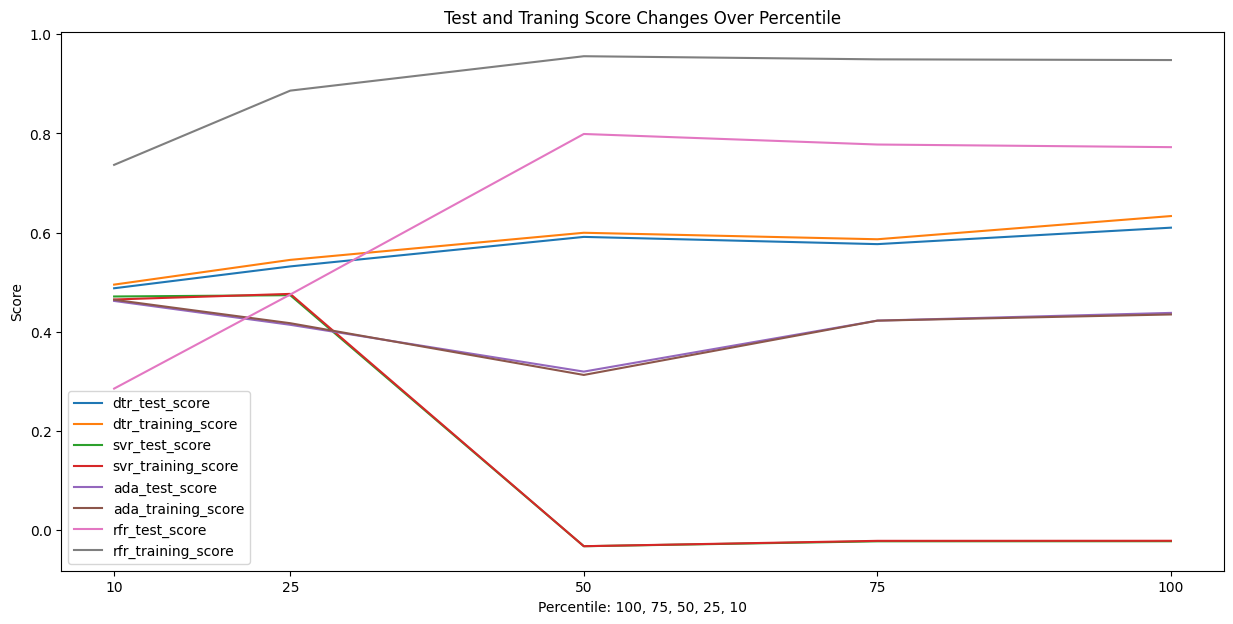

In [17]:
score_lists = [dtr_test_score,dtr_training_score,svr_test_score,svr_training_score,ada_test_score,ada_training_score,
               rfr_test_score,rfr_training_score]
plt.figure(figsize=(15,7))
plt.title('Test and Traning Score Changes Over Percentile')
plt.xlabel('Percentile')
plt.ylabel('Score');

''''''
for i, score_list in zip(score_lists,['dtr_test_score','dtr_training_score','svr_test_score','svr_training_score','ada_test_score',
                                      'ada_training_score','rfr_test_score','rfr_training_score']):
    plt.plot([100, 75, 50, 25, 10],i,label=score_list);
    plt.xticks([100, 75, 50, 25, 10])
    plt.xlabel('Percentile: 100, 75, 50, 25, 10')
    plt.legend()

